# Classification

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("training.csv", skipinitialspace=True, sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              58386 non-null  int64  
 1   IsBadBuy                           58386 non-null  int64  
 2   PurchDate                          58386 non-null  object 
 3   Auction                            58386 non-null  object 
 4   VehYear                            58386 non-null  int64  
 5   VehicleAge                         58386 non-null  int64  
 6   Make                               58386 non-null  object 
 7   Model                              58386 non-null  object 
 8   Trim                               56475 non-null  object 
 9   SubModel                           58379 non-null  object 
 10  Color                              58379 non-null  object 
 11  Transmission                       58378 non-null  obj

In [3]:
col_drop=[ "Model", "SubModel", "WheelTypeID", "Trim", "Color", "VNST", "BYRNO", "RefId", "WheelType", "AUCGUART", "PRIMEUNIT", "MMRAcquisitonRetailCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionAuctionAveragePrice", "MMRCurrentRetailCleanPrice", "MMRCurrentRetailAveragePrice","VehYear","Transmission","Size","VNZIP1"]

In [4]:
df= df.drop(columns=col_drop)

In [5]:
df.head()

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,VehOdo,Nationality,TopThreeAmericanName,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,10/25/2010,ADESA,2,KIA,61184,OTHER ASIAN,OTHER,6628.0,7535.0,6100.0,0,533
1,0,5/27/2009,MANHEIM,3,DODGE,92383,AMERICAN,CHRYSLER,5480.0,6461.0,4000.0,0,1630
2,0,3/18/2010,OTHER,2,DODGE,45965,AMERICAN,CHRYSLER,7497.0,8102.0,7500.0,0,693
3,0,6/8/2009,OTHER,4,FORD,80169,AMERICAN,FORD,4817.0,6658.0,4725.0,0,1633
4,0,3/4/2009,MANHEIM,4,CHRYSLER,77372,AMERICAN,CHRYSLER,5370.0,6811.0,5670.0,0,1623


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   IsBadBuy                       58386 non-null  int64  
 1   PurchDate                      58386 non-null  object 
 2   Auction                        58386 non-null  object 
 3   VehicleAge                     58386 non-null  int64  
 4   Make                           58386 non-null  object 
 5   VehOdo                         58386 non-null  int64  
 6   Nationality                    58382 non-null  object 
 7   TopThreeAmericanName           58382 non-null  object 
 8   MMRCurrentAuctionAveragePrice  58141 non-null  float64
 9   MMRCurrentAuctionCleanPrice    58141 non-null  float64
 10  VehBCost                       58386 non-null  float64
 11  IsOnlineSale                   58386 non-null  int64  
 12  WarrantyCost                   58386 non-null 

In [7]:
df.PurchDate = [int(x[-4:]) for x in df.PurchDate]
df.head()

,IsBadBuy,PurchDate,Auction,VehicleAge,Make,VehOdo,Nationality,TopThreeAmericanName,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,2010,ADESA,2,KIA,61184,OTHER ASIAN,OTHER,6628.0,7535.0,6100.0,0,533
1,0,2009,MANHEIM,3,DODGE,92383,AMERICAN,CHRYSLER,5480.0,6461.0,4000.0,0,1630
2,0,2010,OTHER,2,DODGE,45965,AMERICAN,CHRYSLER,7497.0,8102.0,7500.0,0,693
3,0,2009,OTHER,4,FORD,80169,AMERICAN,FORD,4817.0,6658.0,4725.0,0,1633
4,0,2009,MANHEIM,4,CHRYSLER,77372,AMERICAN,CHRYSLER,5370.0,6811.0,5670.0,0,1623


In [8]:
df.isnull().sum()

IsBadBuy                           0
PurchDate                          0
Auction                            0
VehicleAge                         0
Make                               0
VehOdo                             0
Nationality                        4
TopThreeAmericanName               4
MMRCurrentAuctionAveragePrice    245
MMRCurrentAuctionCleanPrice      245
VehBCost                           0
IsOnlineSale                       0
WarrantyCost                       0
dtype: int64

In [9]:
df = df[~df['Nationality'].isnull()]
df.isnull().sum()

IsBadBuy                           0
PurchDate                          0
Auction                            0
VehicleAge                         0
Make                               0
VehOdo                             0
Nationality                        0
TopThreeAmericanName               0
MMRCurrentAuctionAveragePrice    242
MMRCurrentAuctionCleanPrice      242
VehBCost                           0
IsOnlineSale                       0
WarrantyCost                       0
dtype: int64

In [10]:
df = df[~df['MMRCurrentAuctionAveragePrice'].isnull()]
df.isnull().sum()

IsBadBuy                         0
PurchDate                        0
Auction                          0
VehicleAge                       0
Make                             0
VehOdo                           0
Nationality                      0
TopThreeAmericanName             0
MMRCurrentAuctionAveragePrice    0
MMRCurrentAuctionCleanPrice      0
VehBCost                         0
IsOnlineSale                     0
WarrantyCost                     0
dtype: int64

In [11]:
# It's important if the name is different from OTHER, because it signifies it is a top three
mask = df.TopThreeAmericanName == "OTHER"
column_name = 'TopThreeAmericanName'
df.loc[mask, column_name] = 0
mask = df.TopThreeAmericanName != 0
df.loc[mask, column_name] = 1

In [12]:
df[df["MMRCurrentAuctionAveragePrice"]==0].shape[0]

393

<AxesSubplot:>

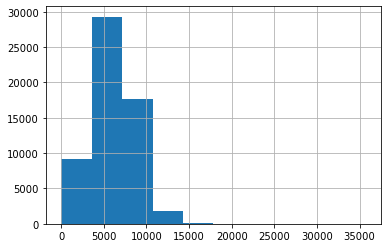

In [13]:
df["MMRCurrentAuctionAveragePrice"].hist(bins=10)

In [14]:
df.MMRCurrentAuctionAveragePrice.mean()

6131.597385620915

In [15]:
df.MMRCurrentAuctionAveragePrice = df.MMRCurrentAuctionAveragePrice.replace(0,df.MMRCurrentAuctionAveragePrice.mean())

In [16]:
df.VehBCost = df.VehBCost.replace(0,df.VehBCost.mean())

<AxesSubplot:>

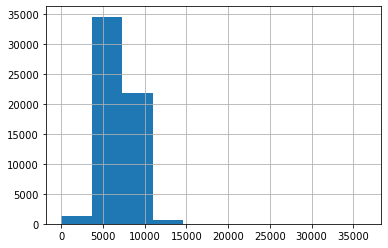

In [17]:
df.VehBCost.hist(bins=10)

In [18]:
df[df["VehBCost"]<=2000].shape

(8, 13)

In [19]:
df[df["VehBCost"]>=13000].shape

(21, 13)

In [20]:
df.drop(df[df.VehBCost <= 2000].index, inplace = True) 

df.drop(df[df.VehBCost >= 13000].index, inplace = True) 

<AxesSubplot:>

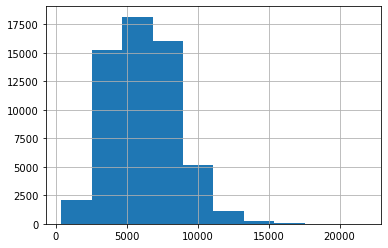

In [21]:
df.MMRCurrentAuctionAveragePrice.hist(bins=10)

In [22]:
df[df["MMRCurrentAuctionAveragePrice"]<=1500].shape

(86, 13)

In [23]:
df[df["MMRCurrentAuctionAveragePrice"]>=15000].shape

(85, 13)

In [24]:
df.drop(df[df.MMRCurrentAuctionAveragePrice <= 1500].index, inplace = True)

df.drop(df[df.MMRCurrentAuctionAveragePrice <= 2000].index, inplace = True)

<AxesSubplot:>

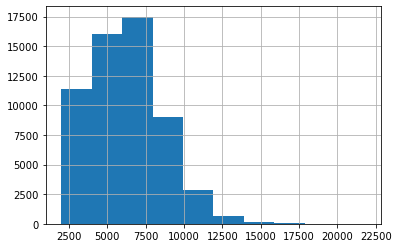

In [25]:
df.MMRCurrentAuctionAveragePrice.hist(bins=10)

In [26]:
df[df["MMRCurrentAuctionAveragePrice"]<=1800].shape

(0, 13)

In [27]:
df[df["MMRCurrentAuctionAveragePrice"]>=15000].shape

(85, 13)

In [28]:
df.drop(df[df.MMRCurrentAuctionAveragePrice <= 1800].index, inplace = True)

df.drop(df[df.MMRCurrentAuctionAveragePrice >= 15000].index, inplace = True)

In [29]:
df.describe()

,IsBadBuy,PurchDate,VehicleAge,VehOdo,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
count,57472.000000,57472.000000,57472.000000,57472.000000,57472.000000,57472.000000,57472.000000,57472.000000,57472.000000
mean,0.121677,2009.522272,4.150630,71463.247842,6196.319961,7416.115291,6745.963507,0.025978,1273.468506
std,0.326915,0.499508,1.687022,14542.939947,2299.255385,2598.993574,1715.943266,0.159071,593.981521
min,0.000000,2009.000000,0.000000,5368.000000,2002.000000,0.000000,2010.000000,0.000000,462.000000
25%,0.000000,2009.000000,3.000000,61784.750000,4372.000000,5474.000000,5470.000000,0.000000,837.000000
50%,0.000000,2010.000000,4.000000,73325.000000,6131.597386,7341.000000,6730.000000,0.000000,1155.000000
75%,0.000000,2010.000000,5.000000,82389.250000,7743.000000,9022.000000,7900.000000,0.000000,1623.000000
max,1.000000,2010.000000,9.000000,115717.000000,14995.000000,19520.000000,12590.000000,1.000000,7498.000000


In [30]:
def clean_data(df):
    make_mapping = {label : idx for idx, label in enumerate(np.unique(df.Make))}
    model_mapping = {label : idx for idx, label in enumerate(np.unique(df.Model))}
    nationality_mapping = {label : idx for idx, label in enumerate(np.unique(df.Nationality))}
    auction_mapping = {label : idx for idx, label in enumerate(np.unique(df.Auction))}
    attributes_mapping = {'Make': make_mapping, 'Nationality' : nationality_mapping, 
                          'Auction': auction_mapping}
    for key in attributes_mapping:
        mapping = attrizbutes_mapping[key]
    df[key] = df[key].map(mapping)
    return df

df = df
for key in attributes_mapping:
    mapping = attributes_mapping[key]
    df[key] = df[key].map(mapping)
df.head()

## Trees

In [ ]:
from sklearn import tree

In [ ]:
X = df.drop(columns=["IsBadBuy"])
X.head()

In [ ]:
y = df.IsBadBuy

In [ ]:
CLF = tree.DecisionTreeClassifier()
CLF = CLF.fit(X, y)

In [ ]:
test = pd.read_csv("test.csv", skipinitialspace=True, sep=',')
test= test.drop(columns=col_drop)

In [ ]:
test.head()

In [ ]:
test.PurchDate = [int(x[-4:]) for x in test.PurchDate]

mask = test.TopThreeAmericanName == "OTHER"
column_name = 'TopThreeAmericanName'
test.loc[mask, column_name] = 0
mask = test.TopThreeAmericanName != 0
test.loc[mask, column_name] = 1

make_mapping = {label : idx for idx, label in enumerate(np.unique(df.Make))}
model_mapping = {label : idx for idx, label in enumerate(np.unique(df.Model))}
nationality_mapping = {label : idx for idx, label in enumerate(np.unique(df.Nationality))}
auction_mapping = {label : idx for idx, label in enumerate(np.unique(df.Auction))}


attributes_mapping = {'Make': make_mapping, 'Nationality' : nationality_mapping, 
                      'Auction': auction_mapping}

for key in attributes_mapping:
    mapping = attributes_mapping[key]
    test[key] = test[key].map(mapping)


X_test= test.drop(columns="IsBadBuy")
y_test = test.IsBadBuy

import graphviz 

In [ ]:
#tree.plot_tree(CLF.fit(X, y)) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

clf = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_split=100, min_samples_leaf=100)
clf = clf.fit(X, y)

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image

attributes = [col for col in df.columns if col != 'IsBadBuy']

dot_data = tree.export_graphviz(CLF, out_file=None,
                                feature_names=attributes,
                                class_names=['BadBuy' if x == 1 else 'GoodBuy' for x in CLF.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=6)  
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
test = test.dropna()
test.Make = test.Make.astype(int)
test.Nationality = test.Nationality.astype(int)
test.info()

In [ ]:
y_pred_tr = clf.predict(X)
print('Train Accuracy %s' % accuracy_score(y, y_pred_tr))

In [ ]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X)

print('Train Accuracy %s' % accuracy_score(y, y_pred_tr))
print('Train F1-score %s' % f1_score(y, y_pred_tr, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)